In [1]:
### Load PPS model
%run ./PPS_model_visual.ipynb

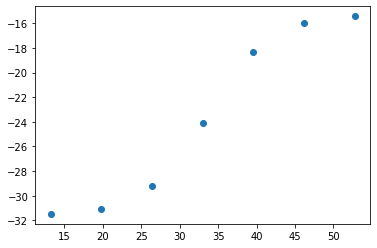

In [2]:
### Visuotactile experiment simulation setup 

# Distance points in cm (network coordinates) 
v_distances = np.asarray([13.2,23.1,33,42.9,52.8])
mydistances = np.linspace(v_distances[0],v_distances[-1],7)

## Simulation setup
simtime = 100 #ms 
bi = 0

# Experimental Data
ymin = -31.56860060612649
ymax = -15.299482759035628 
cp = 33.641
slope = 4.0382
HC_NS_RTs = RTsig(mydistances,cp,slope)
plt.scatter(mydistances,HC_NS_RTs)

In [11]:
def hcnsmodelrun(theta):
    hcnsRTs,ZMs,ZTs,ZAs = experimentrun(mydistances,simtime,bi,theta[0],theta[1],theta[2],theta[3])
    xf = hcnsRTs
    yf = HC_NS_RTs
    
    m = (xf.size * np.sum(xf*yf) - np.sum(xf) * np.sum(yf)) / (xf.size*np.sum(xf*xf) - np.sum(xf) ** 2)
    bias = (np.sum(yf) - m*np.sum(xf)) / xf.size
    
    if bias>0: bias=0
    if m<0: m=0
    
    cost = np.sum(np.square(np.divide(yf-(m*xf+bias),yf)))
    
    return cost*100000

bounds=[(1,50),(500,1000),(15,30),(0.25,1)]
hcnsres = differential_evolution(hcnsmodelrun,bounds,disp=True)

differential_evolution step 1: f(x)= 241.658
differential_evolution step 2: f(x)= 241.658
differential_evolution step 3: f(x)= 241.658
differential_evolution step 4: f(x)= 191.466
differential_evolution step 5: f(x)= 191.466
differential_evolution step 6: f(x)= 144.044
differential_evolution step 7: f(x)= 144.044
differential_evolution step 8: f(x)= 144.044
differential_evolution step 9: f(x)= 144.044
differential_evolution step 10: f(x)= 144.044
differential_evolution step 11: f(x)= 139.675
differential_evolution step 12: f(x)= 139.675
differential_evolution step 13: f(x)= 139.675
differential_evolution step 14: f(x)= 139.675
differential_evolution step 15: f(x)= 139.675
differential_evolution step 16: f(x)= 139.675
differential_evolution step 17: f(x)= 139.675
differential_evolution step 18: f(x)= 139.675
differential_evolution step 19: f(x)= 139.675
differential_evolution step 20: f(x)= 139.675
differential_evolution step 21: f(x)= 139.675
differential_evolution step 22: f(x)= 139.6

In [12]:
print(hcnsres)

     fun: 139.67459188335565
 message: 'Optimization terminated successfully.'
    nfev: 2105
     nit: 34
 success: True
       x: array([  5.26739283, 577.31311472,  29.89454971,   0.67041316])


In [3]:
sHC_RTs,ZMs,ZTs,ZVs = experimentrun(mydistances,simtime,bi,5.26739283, 577.31311472, 29.89454971,0.67041316)

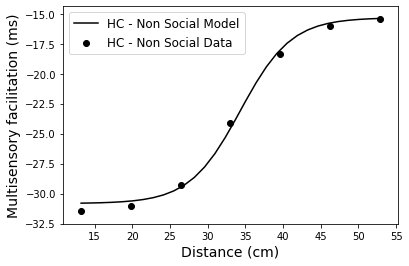

In [4]:
mydistances = np.linspace(v_distances[0],v_distances[-1],7)
xf = sHC_RTs
yf = HC_NS_RTs
m = (xf.size * np.sum(xf*yf) - np.sum(xf) * np.sum(yf)) / (xf.size*np.sum(xf*xf) - np.sum(xf) ** 2)
bias = (np.sum(yf) - m*np.sum(xf)) / xf.size

ymin,ymax = np.min(m*xf+bias),np.max(m*xf+bias) 
dc,h = sigfit(mydistances,m*xf+bias)
mydistances_exp = np.linspace(v_distances[0],v_distances[-1],30)
yf_exp = RTsig(mydistances_exp,dc,h)

plt.figure(1)
plt.plot(mydistances_exp,yf_exp,label = 'HC - Non Social Model',color='k')
plt.scatter(mydistances,yf,label = 'HC - Non Social Data',color='k')
plt.ylabel('Multisensory facilitation (ms)',size=14)
plt.xlabel('Distance (cm)',size=14)
plt.legend(prop={'size': 12})

In [8]:
nonsocialhc = np.asarray([yf_exp,yf])
np.save('Results/nonsocialhc.npy',nonsocialhc)
print(m,bias)

1.8458906909030797 -2.0352045221870987


In [6]:
from sklearn import metrics
print(metrics.mean_squared_error(yf,m*xf+bias,squared=False))

0.41424466124627646
